In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse

In [2]:
df = pd.read_csv("G:\\My Drive\\LBUD\\Datasets\\Grocery Data - Rohlik orders forecasting challenge\\train.csv")
df.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_3,12/5/2020,4091,NaN,0,0,0,0,0,0,0,0.0,0,NaN,NaN,964,17693,Prague_3_2020-12-05
1,Budapest_1,12/5/2020,4623,NaN,0,0,0,0,0,0,0,0.0,0,0.3,0.0,3046,17840,Budapest_1_2020-12-05
2,Prague_2,12/5/2020,4154,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1317,18462,Prague_2_2020-12-05
3,Brno_1,12/5/2020,6447,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,2332,27392,Brno_1_2020-12-05
4,Prague_1,12/5/2020,6895,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722,32575,Prague_1_2020-12-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   warehouse               7340 non-null   object 
 1   date                    7340 non-null   object 
 2   orders                  7340 non-null   int64  
 3   holiday_name            218 non-null    object 
 4   holiday                 7340 non-null   int64  
 5   shutdown                7340 non-null   int64  
 6   mini_shutdown           7340 non-null   int64  
 7   shops_closed            7340 non-null   int64  
 8   winter_school_holidays  7340 non-null   int64  
 9   school_holidays         7340 non-null   int64  
 10  blackout                7340 non-null   int64  
 11  mov_change              7340 non-null   float64
 12  frankfurt_shutdown      7340 non-null   int64  
 13  precipitation           7070 non-null   float64
 14  snow                    7070 non-null   

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns for imputation
columns_to_impute = ['precipitation', 'snow']
imputer = IterativeImputer(random_state=0)

# Impute missing values
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   warehouse               7340 non-null   object 
 1   date                    7340 non-null   object 
 2   orders                  7340 non-null   int64  
 3   holiday_name            218 non-null    object 
 4   holiday                 7340 non-null   int64  
 5   shutdown                7340 non-null   int64  
 6   mini_shutdown           7340 non-null   int64  
 7   shops_closed            7340 non-null   int64  
 8   winter_school_holidays  7340 non-null   int64  
 9   school_holidays         7340 non-null   int64  
 10  blackout                7340 non-null   int64  
 11  mov_change              7340 non-null   float64
 12  frankfurt_shutdown      7340 non-null   int64  
 13  precipitation           7340 non-null   float64
 14  snow                    7340 non-null   

In [6]:
df = df.dropna(subset=['warehouse'])

In [8]:
df = df.fillna(value = {'holiday_name': 'No holiday'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   warehouse               7340 non-null   object 
 1   date                    7340 non-null   object 
 2   orders                  7340 non-null   int64  
 3   holiday_name            7340 non-null   object 
 4   holiday                 7340 non-null   int64  
 5   shutdown                7340 non-null   int64  
 6   mini_shutdown           7340 non-null   int64  
 7   shops_closed            7340 non-null   int64  
 8   winter_school_holidays  7340 non-null   int64  
 9   school_holidays         7340 non-null   int64  
 10  blackout                7340 non-null   int64  
 11  mov_change              7340 non-null   float64
 12  frankfurt_shutdown      7340 non-null   int64  
 13  precipitation           7340 non-null   float64
 14  snow                    7340 non-null   

In [9]:
df['year'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.year
df['month'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.month
df['day'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.day
df.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,...,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id,year,month,day
0,Prague_3,12/5/2020,4091,No holiday,0,0,0,0,0,0,...,0.0,0,1.621126,0.290112,964,17693,Prague_3_2020-12-05,2020,12,5
1,Budapest_1,12/5/2020,4623,No holiday,0,0,0,0,0,0,...,0.0,0,0.300000,0.000000,3046,17840,Budapest_1_2020-12-05,2020,12,5
2,Prague_2,12/5/2020,4154,No holiday,0,0,0,0,0,0,...,0.0,0,0.000000,0.000000,1317,18462,Prague_2_2020-12-05,2020,12,5
3,Brno_1,12/5/2020,6447,No holiday,0,0,0,0,0,0,...,0.0,0,0.000000,0.000000,2332,27392,Brno_1_2020-12-05,2020,12,5
4,Prague_1,12/5/2020,6895,No holiday,0,0,0,0,0,0,...,0.0,0,0.000000,0.000000,1722,32575,Prague_1_2020-12-05,2020,12,5


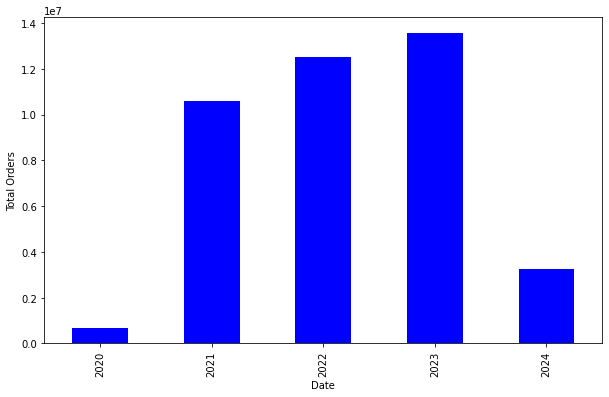

In [11]:
import matplotlib.pyplot as plt
TotalOrders_per_Year = df.groupby('year')['orders'].sum()

plt.figure(figsize=(10, 6))
TotalOrders_per_Year.plot(kind='bar', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.xticks(rotation=90)
plt.show()

In [13]:
TotalOrders_per_Year_Warehouse = df.groupby(['year', 'warehouse'])['orders'].sum()
print(TotalOrders_per_Year_Warehouse)

year  warehouse  
2020  Brno_1          164720
      Budapest_1      117897
      Prague_1        190208
      Prague_2        110661
      Prague_3        109647
2021  Brno_1         2460338
      Budapest_1     1741383
      Munich_1        208806
      Prague_1       2844507
      Prague_2       1727486
      Prague_3       1591888
2022  Brno_1         2594443
      Budapest_1     1963289
      Frankfurt_1     348894
      Munich_1        947146
      Prague_1       3108299
      Prague_2       1867996
      Prague_3       1704855
2023  Brno_1         2790758
      Budapest_1     2102746
      Frankfurt_1     478759
      Munich_1       1148142
      Prague_1       3277928
      Prague_2       1971694
      Prague_3       1800575
2024  Brno_1          668258
      Budapest_1      486153
      Frankfurt_1     115261
      Munich_1        361839
      Prague_1        761715
      Prague_2        456680
      Prague_3        407187
Name: orders, dtype: int64


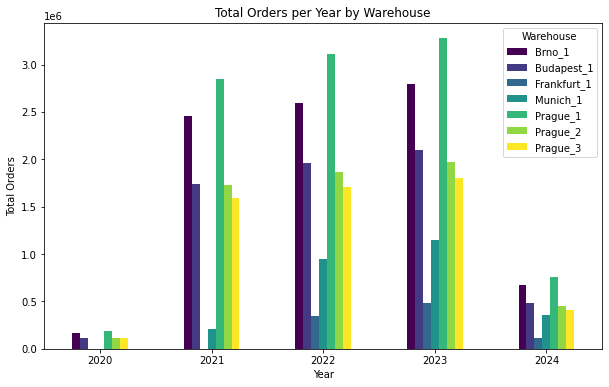

In [14]:
TotalOrders_per_Year_Warehouse = df.groupby(['year', 'warehouse'])['orders'].sum().unstack()

# Plotting
ax = TotalOrders_per_Year_Warehouse.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Total Orders per Year by Warehouse')
plt.xticks(rotation=0)
plt.legend(title='Warehouse')
plt.show()

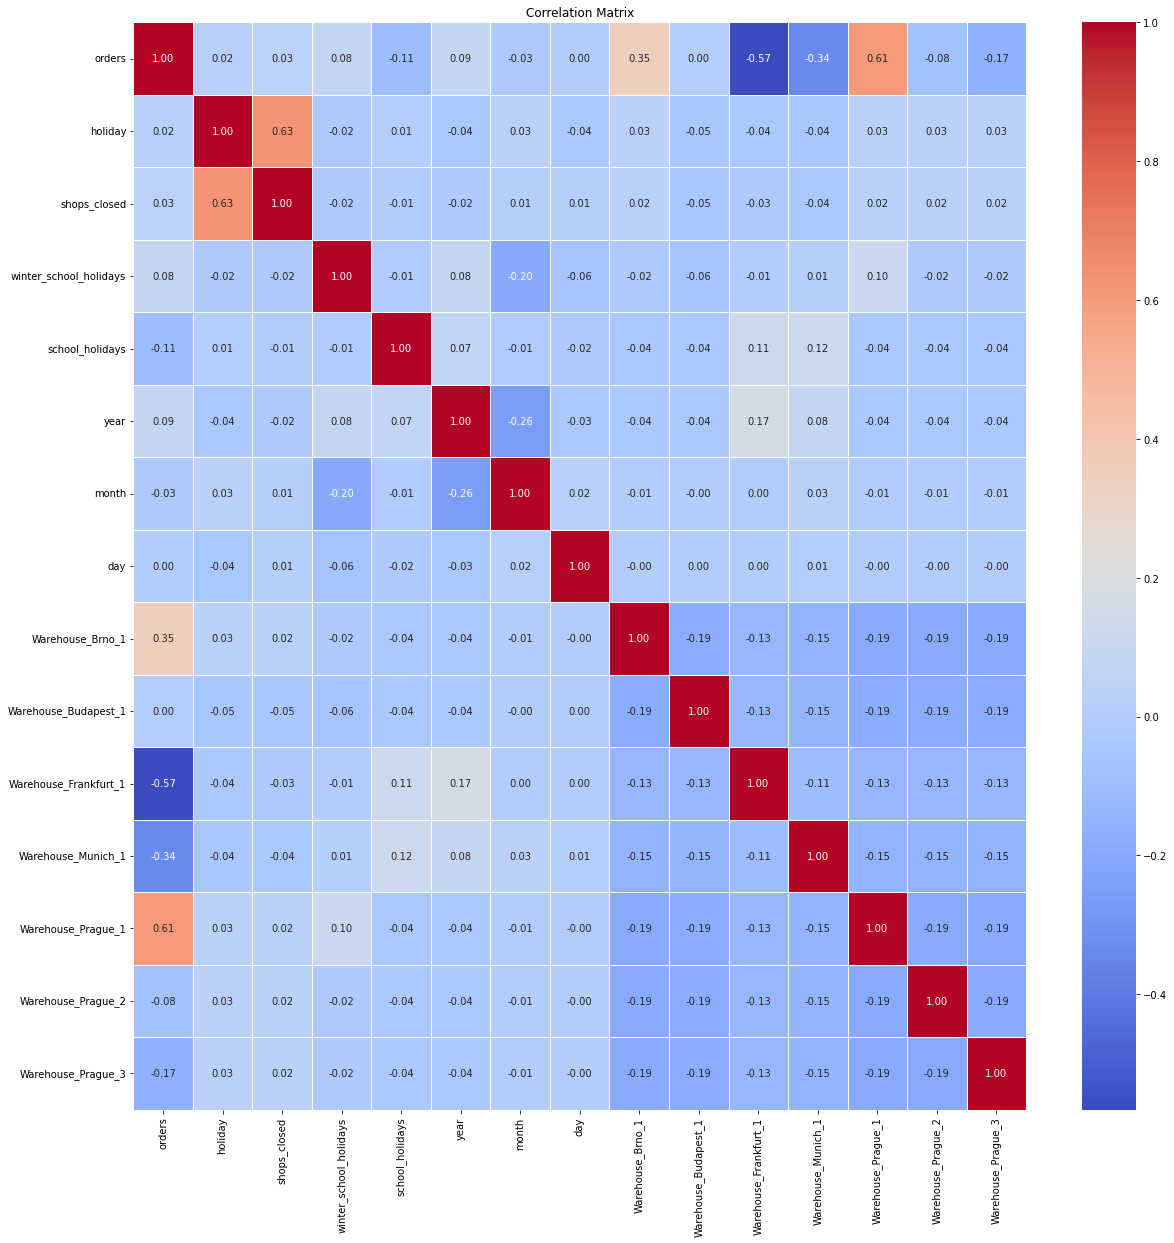

In [27]:
df2 = df.copy()
#df2['date'] = pd.to_datetime(df2['date'])
#df2['year'] = pd.to_datetime(df2['year'])
#df2['month'] = pd.to_datetime(df2['month'])
#df2['day'] = pd.to_datetime(df2['day'])

df2 = df2[['warehouse', 'orders', 'holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays', 
              'year', 'month', 'day']]
df2 = pd.get_dummies(df2, columns=['warehouse'], prefix='Warehouse')

corr_matrix = df2.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
df2 = df2.replace({True: 1 , False: 0})
df2 = (df2 - df2.min())/(df2.max() - df2.min())
df2.head()

,orders,holiday,shops_closed,winter_school_holidays,school_holidays,year,month,day,Warehouse_Brno_1,Warehouse_Budapest_1,Warehouse_Frankfurt_1,Warehouse_Munich_1,Warehouse_Prague_1,Warehouse_Prague_2,Warehouse_Prague_3
0,0.190270,0.0,0.0,0.0,0.0,0.0,1.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.220935,0.0,0.0,0.0,0.0,0.0,1.0,0.133333,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.193902,0.0,0.0,0.0,0.0,0.0,1.0,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.326071,0.0,0.0,0.0,0.0,0.0,1.0,0.133333,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.351893,0.0,0.0,0.0,0.0,0.0,1.0,0.133333,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
X = df2.iloc[:, 1:]
y = df2['orders']

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, random_state = 1)

In [56]:
svr1 = svm.SVR()

In [57]:
svr1.fit(X_train, y_train)

SVR()

In [58]:
y_pred = svr1.predict(X_test)

In [59]:
print(mse(y_pred, y_test))

0.002095529152330058
